#  Modelling Uncertainity with Housing Data

* https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155
* https://www.databricks.com/blog/2022/04/28/how-wrong-is-your-model.html
* https://machinelearningmastery.com/custom-metrics-deep-learning-keras-python/
* https://juanitorduz.github.io/tfp_lm/

# SETUP

In [1]:
# lazypredict setup
!pip install lazypredict
from lazypredict.Supervised import LazyRegressor
from sklearn import datasets
from sklearn.utils import shuffle
import numpy as np

In [2]:
# statsmodels setup
!pip install statsmodels
import statsmodels.api as sm

In [3]:
# Regression Forest Example setup
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import sklearn.model_selection as xval
import forestci as fci


Failed to import duecredit due to No module named 'duecredit'


In [4]:
#tensorflow probablity setup
#@title Import { display-mode: "form" }

import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import tensorflow.compat.v2 as tf
tf.enable_v2_behavior()

import tensorflow_probability as tfp

sns.reset_defaults()
#sns.set_style('whitegrid')
#sns.set_context('talk')
sns.set_context(context='talk',font_scale=0.7)

%matplotlib inline

tfd = tfp.distributions

In [5]:
from numpy import sqrt
from pandas import read_csv
import seaborn as sns
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

print(tf.__version__)

2.11.1


In [420]:
# path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
# df = read_csv(path)
# # print(df)
# X, y =df.iloc[:,12], df.values[:, -1]

# df1 = df
# df1.columns=["F"+str(i) for i in range(0, len(df1.columns))]
# print(df1)

      F0   F1    F2  F3   F4   F5    F6   F7  F8     F9   F10    F11  F12  \
0   0.03 0.00  7.07   0 0.47 6.42 78.90 4.97   2 242.00 17.80 396.90 9.14   
1   0.03 0.00  7.07   0 0.47 7.18 61.10 4.97   2 242.00 17.80 392.83 4.03   
2   0.03 0.00  2.18   0 0.46 7.00 45.80 6.06   3 222.00 18.70 394.63 2.94   
3   0.07 0.00  2.18   0 0.46 7.15 54.20 6.06   3 222.00 18.70 396.90 5.33   
4   0.03 0.00  2.18   0 0.46 6.43 58.70 6.06   3 222.00 18.70 394.12 5.21   
..   ...  ...   ...  ..  ...  ...   ...  ...  ..    ...   ...    ...  ...   
500 0.06 0.00 11.93   0 0.57 6.59 69.10 2.48   1 273.00 21.00 391.99 9.67   
501 0.05 0.00 11.93   0 0.57 6.12 76.70 2.29   1 273.00 21.00 396.90 9.08   
502 0.06 0.00 11.93   0 0.57 6.98 91.00 2.17   1 273.00 21.00 396.90 5.64   
503 0.11 0.00 11.93   0 0.57 6.79 89.30 2.39   1 273.00 21.00 393.45 6.48   
504 0.05 0.00 11.93   0 0.57 6.03 80.80 2.50   1 273.00 21.00 396.90 7.88   

      F13  
0   21.60  
1   34.70  
2   33.40  
3   36.20  
4   28.70  
.. 

In [340]:
path = 'C:/Users/nkalimip/Downloads/Estimate_prediction_process/uncertanity_example/information/ABBY_LAI_trainingdata.csv'
df = pd.read_csv(path)
print(df)
df = df[["B3",   "B4",  "GVI", "NDVI",  "NLI",  "estimateLAI"]]

column_number  = 1
X, y =df.iloc[:,column_number], df.values[:, -1]
# print(y)
# df1 = df
# df1.columns=["F"+str(i) for i in range(0, len(df1.columns))]
# print(df1)

     system:index   B3   B4  GVI  NDVI  NLI  estimateLAI  \
0               1 0.05 0.04 3.14  0.70 0.11      1121.93   
1               2 0.02 0.01 6.07  0.88 0.42      1760.64   
2               3 0.03 0.01 5.50  0.88 0.53      1958.89   
3               4 0.01 0.00 5.31  0.90 0.24      1545.21   
4               6 0.03 0.01 5.89  0.89 0.60      1970.03   
..            ...  ...  ...  ...   ...  ...          ...   
610           987 0.05 0.04 3.85  0.69 0.15      1134.34   
611           989 0.02 0.01 4.86  0.87 0.31      1612.88   
612           994 0.05 0.03 4.33  0.82 0.49      1608.86   
613           996 0.03 0.01 6.90  0.89 0.55      2072.86   
614           999 0.03 0.02 4.35  0.83 0.27      1590.00   

                                       .geo  Unnamed: 8  
0    {"type":"MultiPoint","coordinates":[]}         NaN  
1    {"type":"MultiPoint","coordinates":[]}         NaN  
2    {"type":"MultiPoint","coordinates":[]}         NaN  
3    {"type":"MultiPoint","coordinates":[]}    

In [258]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
# print(y_train)

In [118]:
df = pd.DataFrame({'A':[1,2,3],
                   'B':[4,5,6],
                   'C':[7,8,9],
                   'D':[1,3,5],
                   'E':[5,3,6],
                   'F':[7,4,3]})

print (df)
print(df.iloc[:,1])
   
# X = df.iloc[:, :-1].values
# print (X)
# print (X.shape)

   A  B  C  D  E  F
0  1  4  7  1  5  7
1  2  5  8  3  3  4
2  3  6  9  5  6  3
0    4
1    5
2    6
Name: B, dtype: int64


# 1. Data Exploration

## A - Pairplot

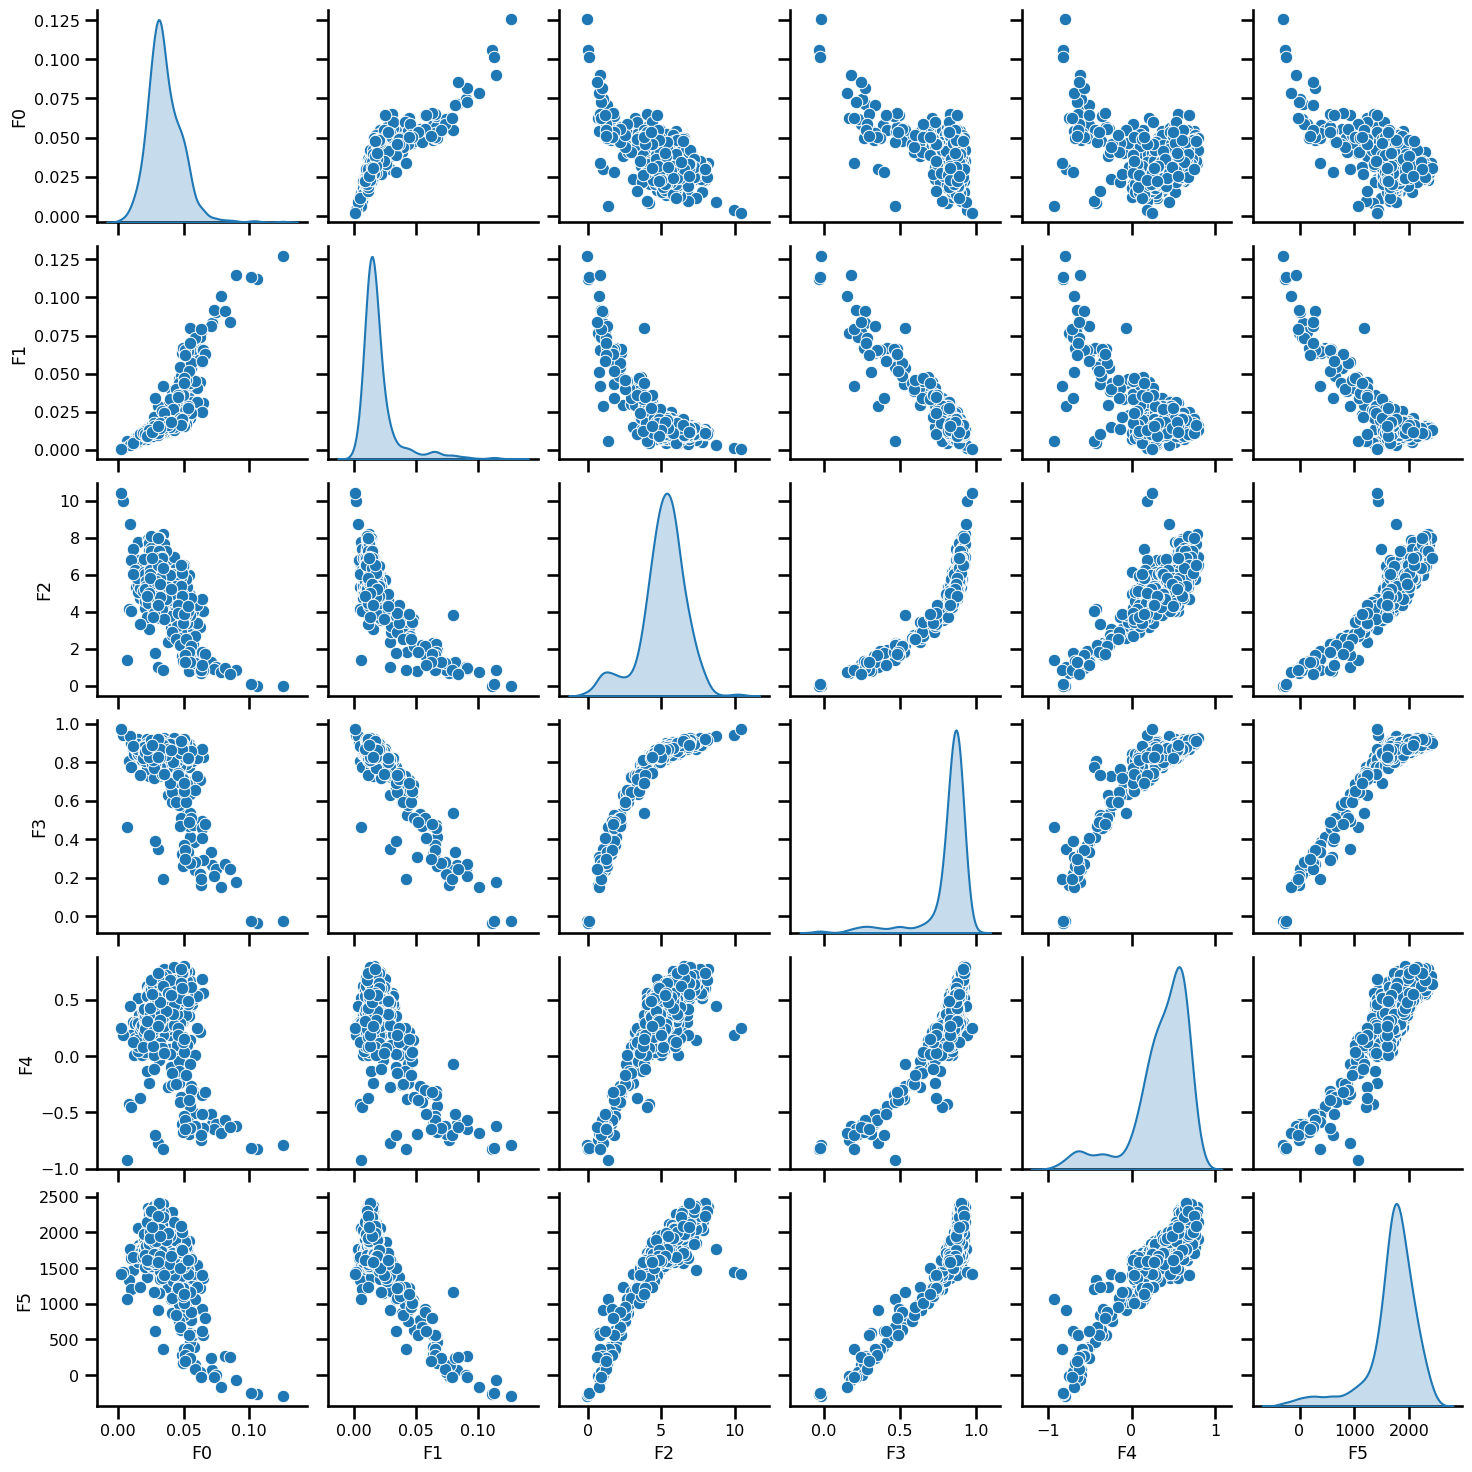

In [11]:
sns.pairplot(df, diag_kind='kde')

## B - Heatmap

<AxesSubplot: >

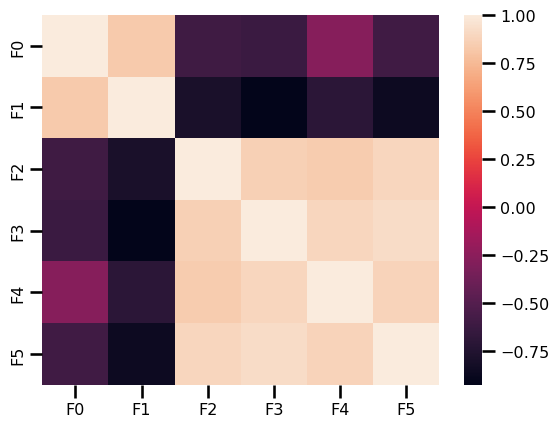

In [14]:
corrMatrix = df1.corr()
sns.heatmap(corrMatrix)

## C -  Matlibplot Plot

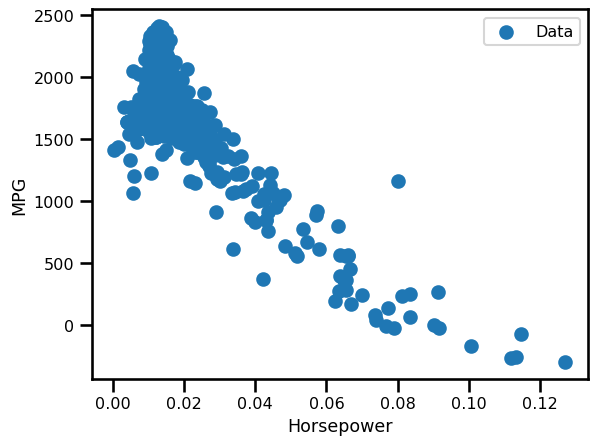

In [259]:
plt.scatter(X,y, label='Data')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.legend()

## D - Lazy Predict

In [260]:
reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )
models,predictions = reg.fit(pd.DataFrame(X_train),pd.DataFrame(X_test),pd.DataFrame(y_train), pd.DataFrame(y_test))
print(predictions)

 26%|█████████████████████████▍                                                                       | 11/42 [00:00<00:01, 20.95it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfGammaLoss'.


 62%|████████████████████████████████████████████████████████████                                     | 26/42 [00:01<00:01, 12.41it/s]

OrthogonalMatchingPursuitCV model failed to execute
Found array with 1 feature(s) (shape=(412, 1)) while a minimum of 2 is required by OrthogonalMatchingPursuitCV.
PoissonRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfPoissonLoss'.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 42/42 [00:04<00:00, 10.19it/s]

                               Adjusted R-Squared  R-Squared      RMSE  \
Model                                                                    
GradientBoostingRegressor                    0.86       0.86    175.55   
AdaBoostRegressor                            0.86       0.86    177.86   
HistGradientBoostingRegressor                0.86       0.86    179.32   
KNeighborsRegressor                          0.86       0.86    180.33   
LGBMRegressor                                0.85       0.85    182.53   
RandomForestRegressor                        0.83       0.83    196.21   
BaggingRegressor                             0.83       0.83    197.66   
XGBRegressor                                 0.80       0.80    212.62   
ExtraTreesRegressor                          0.78       0.78    221.90   
LassoCV                                      0.78       0.78    223.59   
SGDRegressor                                 0.78       0.78    223.86   
LassoLars                             

## E - OLS Linear regression

In [261]:
Y_OLS = y_train
X_OLS = X_train
X_OLS.head()
X_OLS = sm.add_constant(X_OLS)
X_OLS.head()
model = sm.OLS(Y_OLS, X_OLS, missing='drop')
model_result = model.fit()
print(model_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     1114.
Date:                Thu, 30 Mar 2023   Prob (F-statistic):          5.98e-119
Time:                        17:21:35   Log-Likelihood:                -2837.3
No. Observations:                 412   AIC:                             5679.
Df Residuals:                     410   BIC:                             5687.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2182.2903     19.289    113.134      0.0

## F - Joinplot

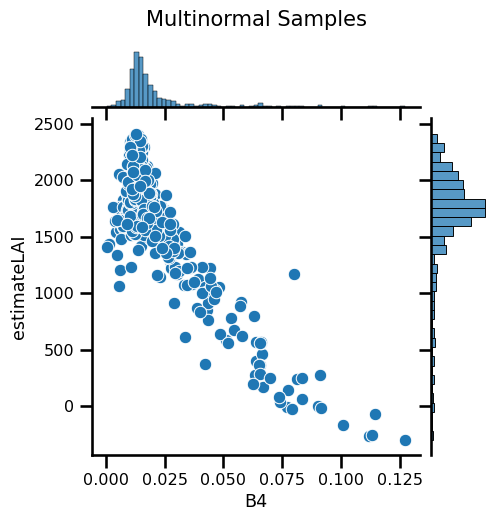

In [319]:
x_new = np.array([[n] for n in X])

g = sns.jointplot(x=df["B4"],y=df["estimateLAI"],     height=5,
                 )
g.fig.suptitle('Multinormal Samples', y=1.04);

## G - KDE Plot

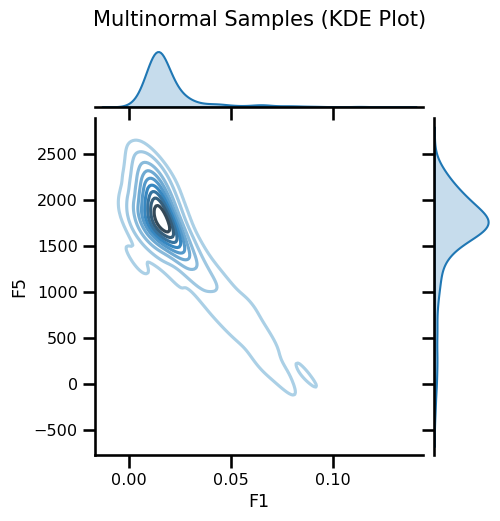

In [265]:
g = sns.JointGrid(x=df["B4"],y=df["estimateLAI"],    height=5)
g = g.plot_joint(sns.kdeplot, cmap='Blues_d')
g = g.plot_marginals(sns.kdeplot, shade=True)
g.fig.suptitle('Multinormal Samples (KDE Plot)', y=1.04);

 ## H - 3D matlibplot plot

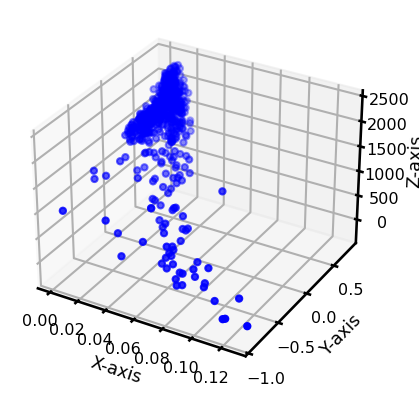

In [318]:
# Create the figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#df = df[["B3",   "B4",  "GVI", "NDVI",  "NLI",  "estimateLAI"]]
# Generate the values
x_vals = df["B4"]
y_vals = df["NLI"]
z_vals = df["estimateLAI"]

# Plot the values
ax.scatter(x_vals, y_vals, z_vals, c = 'b', marker='o')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

plt.show()


# 2. Linear Regression (Single Input) with Tensorflow

## SETUP

In [266]:
def plot_horsepower(x, y):
  plt.scatter(X_train,y_train, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Horsepower')
  plt.ylabel('MPG')
  plt.legend()

In [267]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  # plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

## A - Simple Linear Regression (Single Input) with Tensorflow

In [270]:
horsepower = np.array(df.iloc[:,column_number])#horsepower = np.array(df.iloc[:,12])

horsepower_normalizer = layers.Normalization(input_shape=[1,], axis=None)
horsepower_normalizer.adapt(horsepower)

In [271]:
horsepower_model = tf.keras.Sequential([
    horsepower_normalizer,
    layers.Dense(units=1)
])

horsepower_model.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_6 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_72 (Dense)            (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [272]:
horsepower_model.compile(
    optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.1),
    loss='mean_absolute_error',
     metrics=['mse', 'mae', 'mape']#, 'cosine']
)

In [273]:
%%time
history = horsepower_model.fit(
    X_train,
    y_train,
    epochs=100,
    # Suppress logging.
    verbose=0,
    #  Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: total: 17.2 s
Wall time: 8.09 s


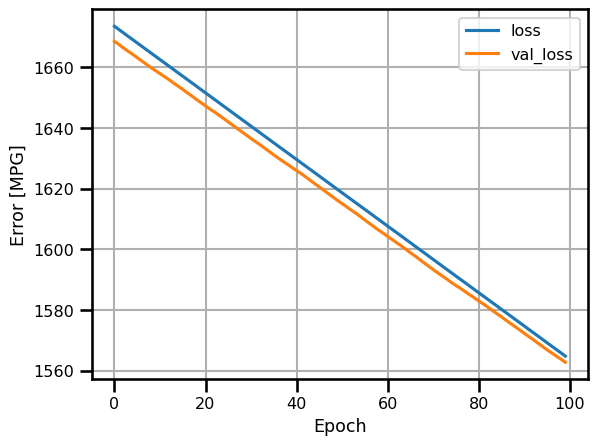

In [274]:
plot_loss(history)

In [281]:
x1 = tf.linspace(-1, 1, 1)
y1 = horsepower_model.predict(x1)

1/1 [==============================] - 0s 31ms/step


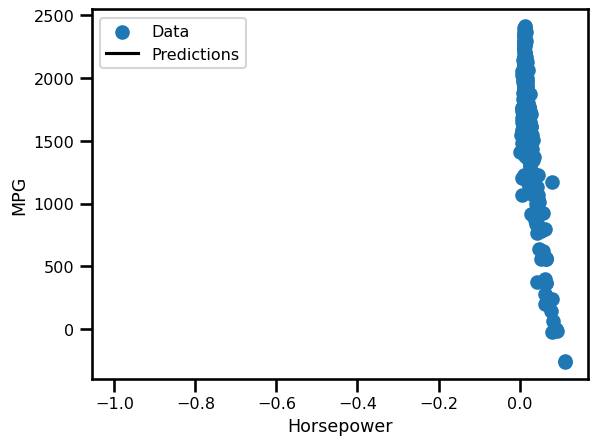

In [279]:
plot_horsepower(x1, y1)

In [119]:
df1['horsepower_model'] = horsepower_model.evaluate(
    X_train, y_train,
    verbose=0)

# print(df1['horsepower_model']

ValueError: Length of values (4) does not match length of index (615)

## B - DNN Linear Regression (Single Input) with Tensorflow

In [282]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.legacy.Adam(0.001),
                 metrics=['mse', 'mae', 'mape'])#, 'cosine'])
  return model

In [283]:
dnn_horsepower_model = build_and_compile_model(horsepower_normalizer)

In [284]:
dnn_horsepower_model.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_6 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_73 (Dense)            (None, 64)                128       
                                                                 
 dense_74 (Dense)            (None, 64)                4160      
                                                                 
 dense_75 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [285]:
%%time
history = dnn_horsepower_model.fit(
    X_train,
    y_train,
    verbose=0, epochs=100,
 validation_split=0.2)

CPU times: total: 23 s
Wall time: 10.1 s


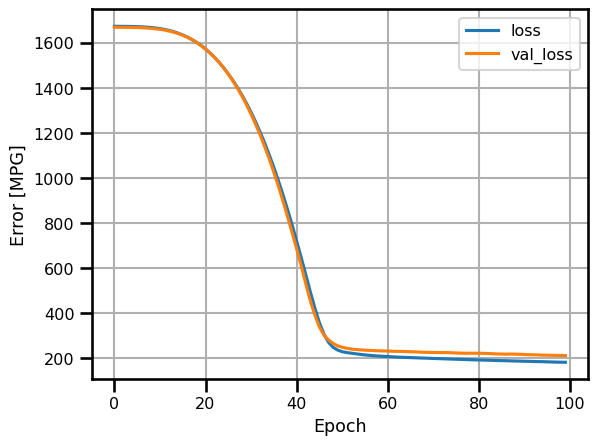

In [286]:
plot_loss(history)

In [302]:
x2 = tf.linspace(-1, 1, 5)
y2 = dnn_horsepower_model.predict(x2)

1/1 [==============================] - 0s 30ms/step


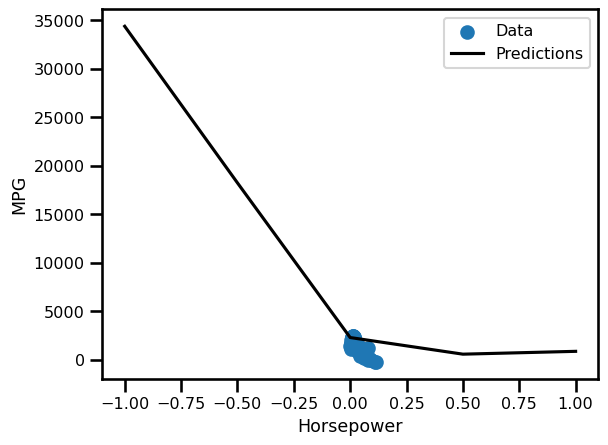

In [303]:
plot_horsepower(x2, y2)

In [241]:
df1['dnn_horsepower_model'] = dnn_horsepower_model.evaluate(
    X_train, y_train,
    verbose=0)

print(df1['dnn_horsepower_model'])

0      3.822137
1      3.822137
2      3.822137
3      3.822137
4      3.822137
         ...   
500    3.822137
501    3.822137
502    3.822137
503    3.822137
504    3.822137
Name: dnn_horsepower_model, Length: 505, dtype: float64


# 3. Linear Regression (Single Input) with Tensorflow Probability

## SETUP

In [341]:
# path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
path = 'C:/Users/nkalimip/Downloads/Estimate_prediction_process/uncertanity_example/information/ABBY_LAI_trainingdata.csv'
df = pd.read_csv(path)#, header=None)
#print(df)
df = df[["B3",   "B4",  "GVI", "NDVI",  "NLI",  "estimateLAI"]]
x1 = df.iloc[:,column_number] #x1 = df.iloc[:,12]
x = np.array([[n] for n in x1])
# print(x)
y = df.values[:, -1]
x = np.asarray(x).astype(np.float32)
y= np.asarray(y).astype(np.float32)
x_range = [-1, 1]
y_range = [-1,2000]
x_train, x_tst, y_train, y_tst = train_test_split(x, y, test_size=0.33)
# print(x_tst)

In [305]:
# Specify the surrogate posterior over `keras.layers.Dense` `kernel` and `bias`.
def posterior_mean_field(kernel_size, bias_size=0, dtype=None):
  n = kernel_size + bias_size
  c = np.log(np.expm1(1.))
  return tf.keras.Sequential([
      tfp.layers.VariableLayer(2 * n, dtype=dtype),
      tfp.layers.DistributionLambda(lambda t: tfd.Independent(
          tfd.Normal(loc=t[..., :n],
                     scale=1e-5 + tf.nn.softplus(c + t[..., n:])),
          reinterpreted_batch_ndims=1)),
  ])

In [306]:
# Specify the prior over `keras.layers.Dense` `kernel` and `bias`.
def prior_trainable(kernel_size, bias_size=0, dtype=None):
  n = kernel_size + bias_size
  return tf.keras.Sequential([
      tfp.layers.VariableLayer(n, dtype=dtype),
      tfp.layers.DistributionLambda(lambda t: tfd.Independent(
          tfd.Normal(loc=t, scale=1),
          reinterpreted_batch_ndims=1)),
  ])

In [307]:
negloglik = lambda y, rv_y: -rv_y.log_prob(y)

## A - Aleatoric uncertainty

In [337]:
# Build model.
model = tf.keras.Sequential([
  
  tf.keras.layers.Dense(1 + 1),
  tfp.layers.DistributionLambda(
      lambda t: tfd.Normal(loc=t[..., :1],
                           scale=1e-3 + tf.math.softplus(0.05 * t[...,1:]))),
])

# Do inference.
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01), loss=negloglik)
model.fit(x, y, epochs=1000, verbose=False);

# Profit.
[print(np.squeeze(w.numpy())) for w in model.weights];
yhat = model(x_tst)
assert isinstance(yhat, tfd.Distribution)

[151.33913 132.05498]
[152.57368 131.15195]


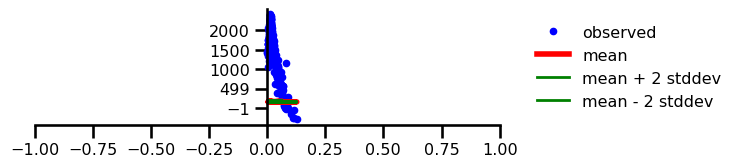

In [342]:
#@title Figure 2: Aleatoric Uncertainty
plt.figure(figsize=[6, 1.5])  # inches
plt.plot(x, y, 'b.', label='observed');

m = yhat.mean()
s = yhat.stddev()

plt.plot(x_tst, m, 'r', linewidth=4, label='mean');
plt.plot(x_tst, m + 2 * s, 'g', linewidth=2, label=r'mean + 2 stddev');
plt.plot(x_tst, m - 2 * s, 'g', linewidth=2, label=r'mean - 2 stddev');

# plt.ylim(-0.,2500);
# plt.yticks(np.linspace(0, 15, 4)[1:]);

plt.yticks(np.linspace(*y_range, num=5));
plt.xticks(np.linspace(*x_range, num=9));

ax=plt.gca();
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.spines['left'].set_smart_bounds(True)
#ax.spines['bottom'].set_smart_bounds(True)
plt.legend(loc='center left', fancybox=True, framealpha=0., bbox_to_anchor=(1.05, 0.5))

plt.savefig('images/a_uncertainty.png', bbox_inches='tight', dpi=300)

## B - Epistemic uncertainty

In [312]:
# Build model.
model = tf.keras.Sequential([
  tfp.layers.DenseVariational(1, posterior_mean_field, prior_trainable, kl_weight=1/x.shape[0]),
  tfp.layers.DistributionLambda(lambda t: tfd.Normal(loc=t, scale=1)),
])

# Do inference.
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01), loss=negloglik)
model.fit(x_train, y_train, epochs=1000, verbose=False);

# Profit.
[print(np.squeeze(w.numpy())) for w in model.weights];
yhat = model(x_tst)
assert isinstance(yhat, tfd.Distribution)

[128.79395    129.11493      1.2172021    0.16048044]
[125.32622 125.74745]


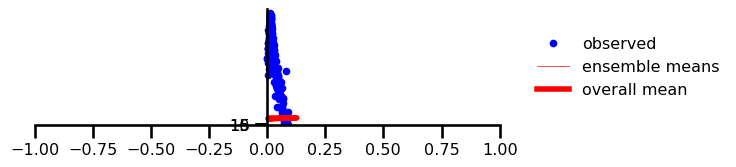

In [313]:
#@title Figure 3: Epistemic Uncertainty
plt.figure(figsize=[6, 1.5])  # inches
plt.clf();
plt.plot(x, y, 'b.', label='observed');

yhats = [model(x_tst) for _ in range(100)]
avgm = np.zeros_like(x_tst[..., 0])
for i, yhat in enumerate(yhats):
  m = np.squeeze(yhat.mean())
  s = np.squeeze(yhat.stddev())
  if i < 25:
    plt.plot(x_tst, m, 'r', label='ensemble means' if i == 0 else None, linewidth=0.5)
  avgm += m
plt.plot(x_tst, avgm/len(yhats), 'r', label='overall mean', linewidth=4)

# plt.ylim(-1.,2500);
# plt.yticks(np.linspace(0, 15, 4)[1:]);

plt.yticks(np.linspace(*y_range, num=5));
plt.xticks(np.linspace(*x_range, num=9));

ax=plt.gca();
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.spines['left'].set_smart_bounds(True)
#ax.spines['bottom'].set_smart_bounds(True)
plt.legend(loc='center left', fancybox=True, framealpha=0., bbox_to_anchor=(1.05, 0.5))

plt.savefig('images/e_uncertainty.png', bbox_inches='tight', dpi=300)

## C - Aleatoric + Epistemic uncertainty

In [333]:
# Build model.
model = tf.keras.Sequential([
  tfp.layers.DenseVariational(1 + 1, posterior_mean_field, prior_trainable, kl_weight=1/x.shape[0]),
  tfp.layers.DistributionLambda(
      lambda t: tfd.Normal(loc=t[..., :1],
                           scale=1e-3 + tf.math.softplus(0.01 * t[...,1:]))),
])

# Do inference.
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01), loss=negloglik)
model.fit(x_train, y_train, epochs=1000, verbose=False);

# Profit.
[print(np.squeeze(w.numpy())) for w in model.weights];
yhat = model(x_tst)
assert isinstance(yhat, tfd.Distribution)

[114.922104   111.17169    116.117805   112.47848      2.5426872
   0.14848909   0.72977924  -1.4337418 ]
[110.66634 109.42381 114.23208 111.48979]


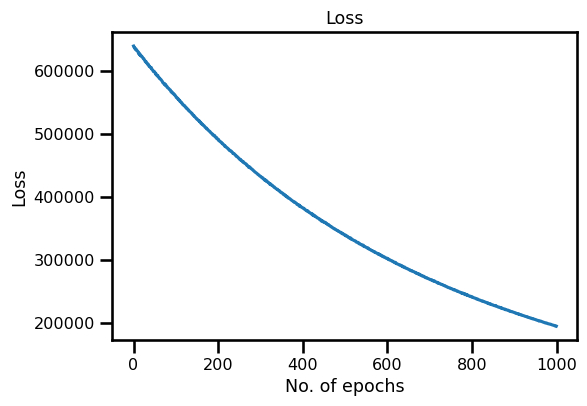

In [334]:
# Get the model
# Fit
history = model.fit(x_train, y_train, epochs=1000, verbose=0)

# Plot loss
plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'])
plt.title('Loss')
plt.xlabel('No. of epochs')
plt.ylabel('Loss')
plt.show()

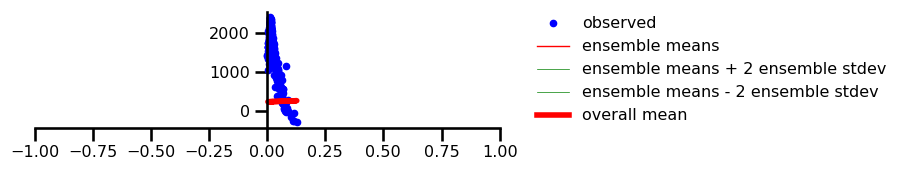

In [336]:
#@title Figure 4: Both Aleatoric & Epistemic Uncertainty
plt.figure(figsize=[6, 1.5])  # inches
plt.plot(x, y, 'b.', label='observed');

yhats = [model(x_tst) for _ in range(100)]
avgm = np.zeros_like(x_tst[..., 0])
for i, yhat in enumerate(yhats):
  m = np.squeeze(yhat.mean())
  s = np.squeeze(yhat.stddev())
  if i < 15:
    plt.plot(x_tst, m, 'r', label='ensemble means' if i == 0 else None, linewidth=1.)
    plt.plot(x_tst, m + 2 * s, 'g', linewidth=0.5, label='ensemble means + 2 ensemble stdev' if i == 0 else None);
    plt.plot(x_tst, m - 2 * s, 'g', linewidth=0.5, label='ensemble means - 2 ensemble stdev' if i == 0 else None);
  avgm += m
plt.plot(x_tst, avgm/len(yhats), 'r', label='overall mean', linewidth=4)

# plt.ylim(-1.,2500);
# plt.yticks(np.linspace(0, 15, 4)[1:]);
plt.yticks(np.linspace(*y_range, num=5));
plt.xticks(np.linspace(*x_range, num=9));

ax=plt.gca();
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.spines['left'].set_smart_bounds(True)
#ax.spines['bottom'].set_smart_bounds(True)
plt.legend(loc='center left', fancybox=True, framealpha=0., bbox_to_anchor=(1.05, 0.5))
plt.savefig('images/a_e_uncertainty.png', bbox_inches='tight', dpi=300)

# (Polynomial) Linear Regression (Single Input) with Tensorflow Probability

# 4. Random Forest Regression Uncertainity

## SETUP

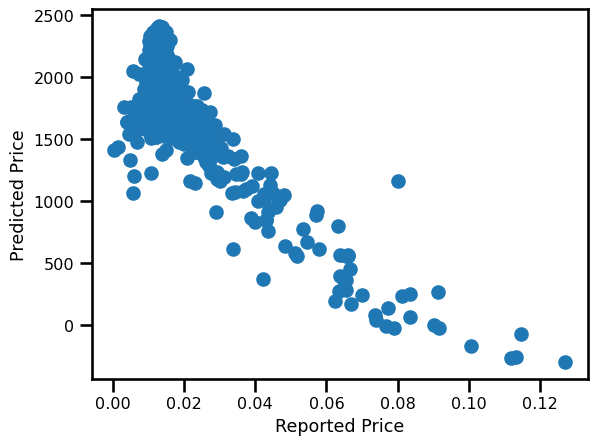

In [315]:
# split data into training and test set
X_train, X_test, y_train, y_test = xval.train_test_split(
    x,
    y,
    test_size=0.25,
    random_state=42)

# Create RandomForestRegressor
n_trees = 2000
forest = RandomForestRegressor(n_estimators=n_trees, random_state=42)
forest.fit(X_train, y_train)
y_hat = forest.predict(X_test)

plt.scatter(x, y)
plt.xlabel('Reported Price')
plt.ylabel('Predicted Price')
plt.show()

## A - Uncertainty (Predicted vs. Reported)

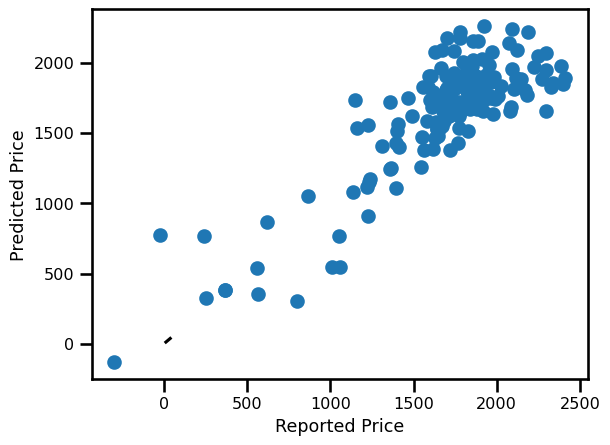

In [316]:
# Plot predicted MPG without error bars
plt.scatter(y_test, y_hat)
plt.plot([5, 45], [5, 45], 'k--')
plt.xlabel('Reported Price')
plt.ylabel('Predicted Price')
plt.show()

## B - Uncertainty (Predicted vs. Reported) including error bars

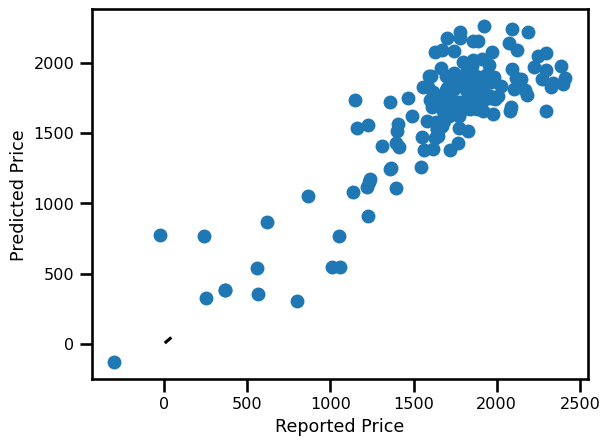

In [317]:
# Calculate the variance
V_IJ_unbiased = fci.random_forest_error(forest, X_train, X_test)

# Plot error bars for predicted MPG using unbiased variance
plt.errorbar(y_test, y_hat, yerr=np.sqrt(V_IJ_unbiased), fmt='o')
plt.plot([5, 45], [5, 45], 'k--')
plt.xlabel('Reported Price')
plt.ylabel('Predicted Price')
plt.show()

# SETUP - 2

In [363]:
# path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
# df = read_csv(path)
# # print(df)
# X, y =df.values[:, :-1], df.values[:, -1]

# df1 = df
# df1.columns=["F"+str(i) for i in range(0, len(df1.columns))]
# print(df1)

      F0   F1    F2  F3   F4   F5    F6   F7  F8     F9   F10    F11  F12  \
0   0.03 0.00  7.07   0 0.47 6.42 78.90 4.97   2 242.00 17.80 396.90 9.14   
1   0.03 0.00  7.07   0 0.47 7.18 61.10 4.97   2 242.00 17.80 392.83 4.03   
2   0.03 0.00  2.18   0 0.46 7.00 45.80 6.06   3 222.00 18.70 394.63 2.94   
3   0.07 0.00  2.18   0 0.46 7.15 54.20 6.06   3 222.00 18.70 396.90 5.33   
4   0.03 0.00  2.18   0 0.46 6.43 58.70 6.06   3 222.00 18.70 394.12 5.21   
..   ...  ...   ...  ..  ...  ...   ...  ...  ..    ...   ...    ...  ...   
500 0.06 0.00 11.93   0 0.57 6.59 69.10 2.48   1 273.00 21.00 391.99 9.67   
501 0.05 0.00 11.93   0 0.57 6.12 76.70 2.29   1 273.00 21.00 396.90 9.08   
502 0.06 0.00 11.93   0 0.57 6.98 91.00 2.17   1 273.00 21.00 396.90 5.64   
503 0.11 0.00 11.93   0 0.57 6.79 89.30 2.39   1 273.00 21.00 393.45 6.48   
504 0.05 0.00 11.93   0 0.57 6.03 80.80 2.50   1 273.00 21.00 396.90 7.88   

      F13  
0   21.60  
1   34.70  
2   33.40  
3   36.20  
4   28.70  
.. 

In [346]:
path = 'C:/Users/nkalimip/Downloads/Estimate_prediction_process/uncertanity_example/information/ABBY_LAI_trainingdata.csv'
df = pd.read_csv(path)
df = df[["B3",  "B4",  "GVI", "NDVI",  "NLI",  "estimateLAI"]]
# print(df)
X,y = df.loc[:, df.columns != 'estimateLAI'],df.loc[:, df.columns == 'estimateLAI']

In [347]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(y_train)

     estimateLAI
448      1501.94
461       -18.94
326      1680.97
265      2223.07
317      1848.50
..           ...
183      2014.37
49       1793.58
295      2255.95
496      1507.03
43       1611.89

[412 rows x 1 columns]


# 5 - Data Exploration- 2 Lazy Regression

In [256]:
reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )
models,predictions = reg.fit(pd.DataFrame(X_train),pd.DataFrame(X_test),pd.DataFrame(y_train), pd.DataFrame(y_test))
print(predictions)

 26%|█████████████████████████▍                                                                       | 11/42 [00:00<00:01, 17.98it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfGammaLoss'.


 74%|███████████████████████████████████████████████████████████████████████▌                         | 31/42 [00:02<00:00, 16.60it/s]

PoissonRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfPoissonLoss'.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 42/42 [00:05<00:00,  8.01it/s]

                               Adjusted R-Squared  R-Squared     RMSE  \
Model                                                                   
RandomForestRegressor                        0.93       0.93   117.47   
GradientBoostingRegressor                    0.92       0.93   119.87   
ExtraTreesRegressor                          0.92       0.93   119.89   
AdaBoostRegressor                            0.92       0.92   125.74   
BaggingRegressor                             0.92       0.92   125.88   
XGBRegressor                                 0.92       0.92   126.09   
LGBMRegressor                                0.92       0.92   126.49   
HistGradientBoostingRegressor                0.91       0.92   127.02   
KNeighborsRegressor                          0.91       0.92   127.22   
BayesianRidge                                0.90       0.91   135.36   
Ridge                                        0.90       0.91   135.38   
RidgeCV                                      0.90  

# 6. Simple Linear Regression (Multi Input) with Tensorflow

# 7. DNN Linear Regression ( Input) with Tensorflow

In [351]:
# mlp for regression
from numpy import sqrt
from pandas import read_csv
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
# from tensorflow.keras.layers import MaxPooling1D

# load the dataset
# path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
path = 'C:/Users/nkalimip/Downloads/Estimate_prediction_process/uncertanity_example/information/ABBY_LAI_trainingdata.csv'
df_ = read_csv(path)#, header=None)
df_ = df_[["B3",  "B4",  "GVI", "NDVI",  "NLI",  "estimateLAI"]]
df_.to_csv('C:/Users/nkalimip/Downloads/Estimate_prediction_process/uncertanity_example/information/ABBY_LAI_trainingdata2.csv')
df = read_csv('C:/Users/nkalimip/Downloads/Estimate_prediction_process/uncertanity_example/information/ABBY_LAI_trainingdata2.csv',header=None)
df = df.iloc[1:]


#normallize
from sklearn import preprocessing
import pandas as pd

# d = preprocessing.normalize(df)
scaler = preprocessing.MinMaxScaler()
d = scaler.fit_transform(df)

df = pd.DataFrame(d, columns=df.columns)
print(df)



#split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]

print(df)
X = np.asarray(X).astype('float32')
y = np.asarray(y).astype('float32')

# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# determine the number of input features
n_features = X_train.shape[1]
# print(X_train.shape[1])
# define model
model = Sequential()
model.add(Dense(50, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(50, activation='relu', kernel_initializer='he_normal'))
# model.add(MaxPooling1D(2))
model.add(Dense(1))

# compile the model
model.compile(optimizer='adam', loss='mse')
# fit the model
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0)
# evaluate the model
error = model.evaluate(X_test, y_test, verbose=0)
print('MSE: %.3f, RMSE: %.3f' % (error, sqrt(error)))
# # make a prediction
# # row = [0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98]
row =  [0.00, 0.16, 0.08, 0.58, 0.91, 0.78]
# row = [1.00,  0.022062358 , 0.009950795,  6.067018173,  0.880013956,  0.419106492]   
yhat = model.predict([row])
print('Predicted: %.3f' % yhat)

       0    1    2    3    4    5    6
0   0.00 0.42 0.31 0.30 0.73 0.60 0.52
1   0.00 0.16 0.08 0.58 0.91 0.78 0.76
2   0.00 0.25 0.11 0.53 0.91 0.84 0.83
3   0.00 0.09 0.03 0.51 0.93 0.68 0.68
4   0.01 0.27 0.11 0.57 0.92 0.88 0.84
..   ...  ...  ...  ...  ...  ...  ...
610 0.99 0.39 0.34 0.37 0.72 0.62 0.53
611 1.00 0.16 0.07 0.47 0.90 0.72 0.71
612 1.00 0.41 0.21 0.42 0.85 0.82 0.70
613 1.00 0.19 0.09 0.66 0.92 0.86 0.87
614 1.00 0.23 0.12 0.42 0.86 0.69 0.70

[615 rows x 7 columns]
       0    1    2    3    4    5    6
0   0.00 0.42 0.31 0.30 0.73 0.60 0.52
1   0.00 0.16 0.08 0.58 0.91 0.78 0.76
2   0.00 0.25 0.11 0.53 0.91 0.84 0.83
3   0.00 0.09 0.03 0.51 0.93 0.68 0.68
4   0.01 0.27 0.11 0.57 0.92 0.88 0.84
..   ...  ...  ...  ...  ...  ...  ...
610 0.99 0.39 0.34 0.37 0.72 0.62 0.53
611 1.00 0.16 0.07 0.47 0.90 0.72 0.71
612 1.00 0.41 0.21 0.42 0.85 0.82 0.70
613 1.00 0.19 0.09 0.66 0.92 0.86 0.87
614 1.00 0.23 0.12 0.42 0.86 0.69 0.70

[615 rows x 7 columns]
(412, 6) (203, 6